In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [9]:
data=pd.read_csv("/Users/abhi/Downloads/Crop_recommendation.csv")


In [10]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
all_columns = data.columns[:-1]
label_encoder = LabelEncoder()
X = data[all_columns]
y = label_encoder.fit_transform(data["label"])
print(X.shape, y.shape)

(2200, 7) (2200,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1760, 7), (1760,)
Train Data: (440, 7), (440,)


Accuracy at k = 1 is 0.975
Accuracy at k = 2 is 0.9681818181818181
Accuracy at k = 3 is 0.975
Accuracy at k = 4 is 0.9795454545454545
Accuracy at k = 5 is 0.9772727272727273
Accuracy at k = 6 is 0.9681818181818181
Accuracy at k = 7 is 0.9704545454545455
Accuracy at k = 8 is 0.9704545454545455
Accuracy at k = 9 is 0.9659090909090909
Accuracy at k = 10 is 0.9613636363636363
Accuracy at k = 11 is 0.9590909090909091
Accuracy at k = 12 is 0.9568181818181818
Accuracy at k = 13 is 0.9590909090909091
Accuracy at k = 14 is 0.9590909090909091
Accuracy at k = 15 is 0.9568181818181818
Accuracy at k = 16 is 0.9545454545454546
Accuracy at k = 17 is 0.9545454545454546
Accuracy at k = 18 is 0.95
Accuracy at k = 19 is 0.9522727272727273
Accuracy at k = 20 is 0.9477272727272728
Accuracy at k = 21 is 0.9431818181818182
Accuracy at k = 22 is 0.9409090909090909
Accuracy at k = 23 is 0.9363636363636364
Accuracy at k = 24 is 0.9409090909090909
Accuracy at k = 25 is 0.9318181818181818
Accuracy at k = 26 is 0.

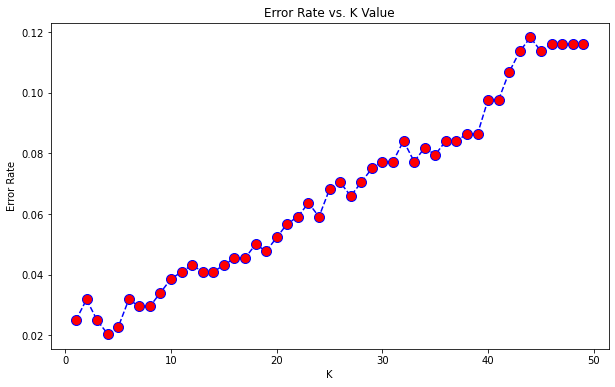

In [16]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Accuracy on Test Data: 97.95454545454545%


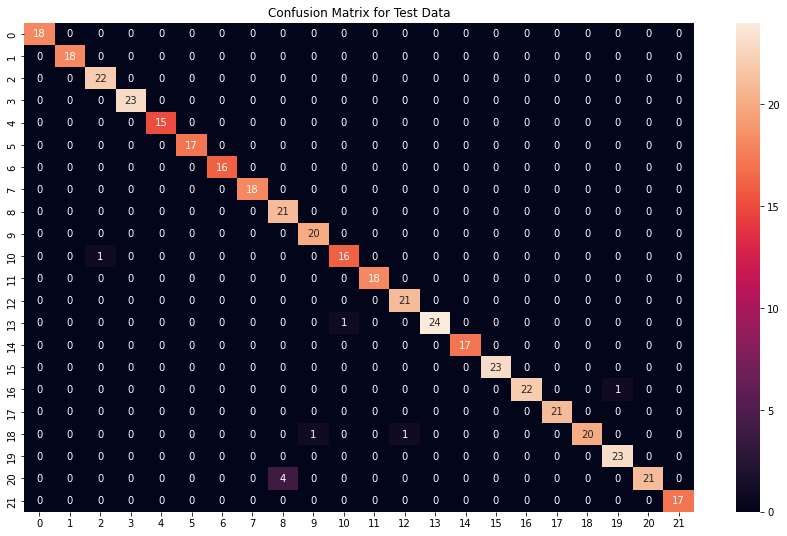


Accuracy on Whole Data: 98.04545454545455%


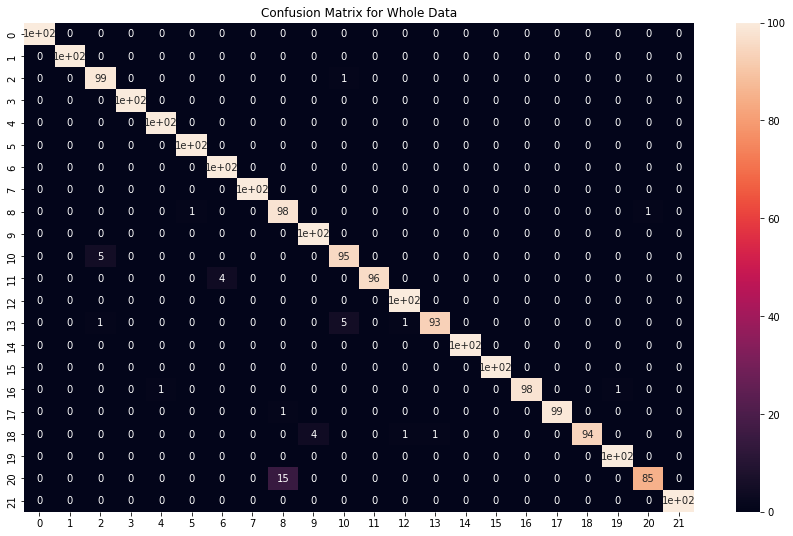

In [18]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 4))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [19]:
pickle.dump(knn_pipeline, open("knn_pipeline.pkl", "wb"))